# Navigate The Maze 🏁

## Description

Navigate The Maze 🏁 is a Reinforcement Learning challenge that aims to train an agent to navigate a naze under stochastic changes to the environment, which means that the obstacles can be changed which may result in shortcuts creation that the agent must be aware of during the training process

## Modules

The random seed is specified for comptability purposes for all participants, please note that the seed will change on jury's evaluation to test the algorithms generalizability

In [ ]:
SEED = 15

In [ ]:
import numpy as np
np.random.seed(SEED)

import matplotlib.pyplot as plt

## Constants

Environment dynamics parameters, as well as the simulation constraints

In [ ]:
GRID_DIM = 8
START_IDX = (1, 1)
FINISH_IDX = (6, 6)
OBSTACLES = [
    (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5),
    (4, 2), (3, 5),
    (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7)
]

EPISODES = 2000
MAX_STEPS = 100
N_SHORTCUTS = 9
SHORTCUTS = [int(np.random.normal((i+1)*(EPISODES/N_SHORTCUTS+1), 50)) for i in range(N_SHORTCUTS)]

## Environment

The environment dynamics include the following items:
- Actions are 0(UP), 1(RIGHT), 2(DOWN), 3(LEFT)
- All actions lead to a -1 reward except for the ones reaching the destination (this reward motivates the agent to reach the goal as faster as possible)
- Moving to a wall keeps the agent in its same location

In [ ]:
class Environment():
    def __init__(self, grid_w, grid_h, start_idx, finish_idx, obstacles) -> None:
        self.grid_h = grid_h
        self.grid_w = grid_w
        self.current_idx = start_idx
        self.start_idx = start_idx
        self.finish_idx = finish_idx
        self.matrix = np.zeros((grid_h, grid_w))
        self.original_obstacles = obstacles
        self.obstacles = obstacles
        for obstacle in obstacles:
            self.matrix[obstacle[0], obstacle[1]] = 1

    def visualize(self, value_function=None, path=None):
        binary_matrix = np.array(self.matrix)
        plt.figure(figsize=(self.grid_w//2, self.grid_h//2))
        plt.imshow(binary_matrix, cmap='binary', interpolation='nearest')

        for i in range(self.grid_w - 1):
            plt.axvline(i + 0.5, color='gray', linestyle='-', linewidth=0.5)
        for i in range(self.grid_h - 1):
            plt.axhline(i + 0.5, color='gray', linestyle='-', linewidth=0.5)

        if path is None:
            plt.scatter(self.current_idx[1], self.current_idx[0], color='orange', s=300, marker='s', label='Current')
        else:
            plt.scatter([idx[1] for idx in path], [idx[0] for idx in path], color='orange', s=300, marker='s', label='Path')
        plt.scatter(self.start_idx[1], self.start_idx[0], color='green', s=200, marker='o', label='Start')
        plt.scatter(self.finish_idx[1], self.finish_idx[0], color='red', s=200, marker='o', label='Finish')

        if value_function is not None:
            for i in range(self.grid_h):
                for j in range(self.grid_w):
                    value = value_function[i][j]
                    plt.text(j, i, f'{value:.1f}', color='black', ha='center', va='center')

        plt.title('Maze Visualization')
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.show()

    def step(self, action):
        # UP
        if action == 0:
            next_index = (self.current_idx[0] - 1, self.current_idx[1])
            if next_index[0] >= 0 and self.matrix[next_index[0]][next_index[1]] == 0:
                self.current_idx = next_index
                if next_index == self.finish_idx:
                    return next_index, 0, True
                return next_index, -1, False
            else:
                return self.current_idx, -1, False

        # RIGHT
        if action == 1:
            next_index = (self.current_idx[0], self.current_idx[1] + 1)
            if next_index[1] < self.grid_w and self.matrix[next_index[0]][next_index[1]] == 0:
                self.current_idx = next_index
                if next_index == self.finish_idx:
                    return next_index, 0, True
                return next_index, -1, False
            else:
                return self.current_idx, -1, False

        # DOWN
        if action == 2:
            next_index = (self.current_idx[0] + 1, self.current_idx[1])
            if next_index[0] < self.grid_h and self.matrix[next_index[0]][next_index[1]] == 0:
                self.current_idx = next_index
                if next_index == self.finish_idx:
                    return next_index, 0, True
                return next_index, -1, False
            else:
                return self.current_idx, -1, False

        # LEFT
        if action == 3:
            next_index = (self.current_idx[0], self.current_idx[1] - 1)
            if next_index[1] >= 0 and self.matrix[next_index[0]][next_index[1]] == 0:
                self.current_idx = next_index
                if next_index == self.finish_idx:
                    return next_index, 0, True
                return next_index, -1, False
            else:
                return self.current_idx, -1, False

    def reset(self, reset_obstacles=False):
        self.current_idx = self.start_idx
        if reset_obstacles:
            self.obstacles = self.original_obstacles
        return self.current_idx

    def remove_random_obstacle(self):
        num_obstacles = np.sum(self.matrix)
        if num_obstacles > 0:
            z = np.random.randint(num_obstacles)
            new_obstacles = []
            for i in range(len(self.obstacles)):
                if (z % len(self.obstacles)) != i:
                    new_obstacles.append(self.obstacles[i])
            self.obstacles = new_obstacles
            self.matrix = np.zeros((len(self.matrix), len(self.matrix[0])))
            for obstacle in self.obstacles:
                self.matrix[obstacle[0], obstacle[1]] = 1

- GREEN: Starting position
- YELLOW: Agent location
- RED: Goal position

In [ ]:
env = Environment(grid_h=GRID_DIM, grid_w=GRID_DIM, start_idx=START_IDX, finish_idx=FINISH_IDX, obstacles=OBSTACLES)
env.visualize()

## Agent

In [ ]:
class Agent():
    def __init__(self, env: Environment) -> None:
        self.env = env
        self.state = env.reset()

    def act(self, state):
        pass

In [ ]:
class RandomAgent(Agent):
    def act(self, state):
        return np.random.choice(4)

In [ ]:
# Note that you can include more parameters or methods depending on your training algorithm
class YourAgent(Agent):
    def __init__(self, env: Environment) -> None:
        super.__init__(env)

    def act(self, state):
        pass

## Playground

Experimental Space

## Training

In [ ]:
env = Environment(grid_h=GRID_DIM, grid_w=GRID_DIM, start_idx=START_IDX, finish_idx=FINISH_IDX, obstacles=OBSTACLES)
agent = YourAgent(env)

rewards = []
dones = 0
for i in range(1, EPISODES):
    if i in SHORTCUTS:
        env.remove_random_obstacle()
        print(f"Shortcut at episode {i}")
        env.visualize()
    path = [env.current_idx]
    k = 1
    done = False
    accumulated_reward = 0
    while not done and k < MAX_STEPS:
        state = env.current_idx
        action = agent.act(state, ...)
        next_state, reward, done = env.step(action)
        # You can add more methods for your learning algorithm

        k += 1
        accumulated_reward += reward
        path.append(env.current_idx)
    if done:
        print(f'Finished Episode {i+1}, reached target: {done}')
        env.visualize(path=path)
    env.reset()
    dones += done
    rewards.append(accumulated_reward)

print(f"Success rate: {dones/EPISODES}")
print(f"Average reward: {np.mean(rewards):.2f}")
plt.plot(range(1, EPISODES), rewards)

## Evaluation (On latest environment)

Do not modify this except your `agent.act(state, ...)`

In [ ]:
env.reset()
rewards = []
dones = 0

for i in range(1, EPISODES):
    k = 1
    done = False
    accumulated_reward = 0
    while not done and k < MAX_STEPS:
        state = env.current_idx
        action = agent.act(state, ...)
        next_state, reward, done = env.step(action)
        k += 1
        accumulated_reward += reward

    env.reset()
    dones += done
    rewards.append(accumulated_reward)

print(f"Success rate: {dones/EPISODES}")
print(f"Average reward: {np.mean(rewards):.2f}")

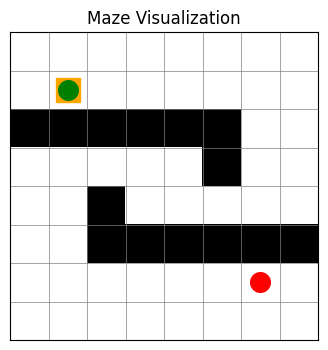

Episode: 1, Reward: -100, Epsilon: 0.995
Episode: 2, Reward: -100, Epsilon: 0.990
Episode: 3, Reward: -100, Epsilon: 0.985
Episode: 4, Reward: -100, Epsilon: 0.980
Episode: 5, Reward: -100, Epsilon: 0.975
Episode: 6, Reward: -100, Epsilon: 0.970
Episode: 7, Reward: -100, Epsilon: 0.966
Episode: 8, Reward: -100, Epsilon: 0.961
Episode: 9, Reward: -100, Epsilon: 0.956
Episode: 10, Reward: -100, Epsilon: 0.951
Episode: 11, Reward: -100, Epsilon: 0.946
Episode: 12, Reward: -100, Epsilon: 0.942
Episode: 13, Reward: -100, Epsilon: 0.937
Episode: 14, Reward: -100, Epsilon: 0.932
Episode: 15, Reward: -100, Epsilon: 0.928
Episode: 16, Reward: -100, Epsilon: 0.923
Episode: 17, Reward: -100, Epsilon: 0.918
Episode: 18, Reward: -100, Epsilon: 0.914
Episode: 19, Reward: -100, Epsilon: 0.909
Episode: 20, Reward: -100, Epsilon: 0.905
Episode: 21, Reward: -100, Epsilon: 0.900
Episode: 22, Reward: -100, Epsilon: 0.896
Episode: 23, Reward: -100, Epsilon: 0.891
Episode: 24, Reward: -100, Epsilon: 0.887
E

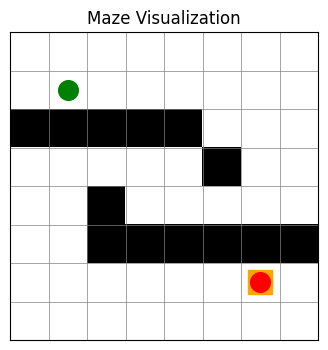

Episode: 207, Reward: -83, Epsilon: 0.354
Episode: 208, Reward: -56, Epsilon: 0.353
Episode: 209, Reward: -100, Epsilon: 0.351
Episode: 210, Reward: -86, Epsilon: 0.349
Episode: 211, Reward: -96, Epsilon: 0.347
Episode: 212, Reward: -100, Epsilon: 0.346
Episode: 213, Reward: -100, Epsilon: 0.344
Episode: 214, Reward: -100, Epsilon: 0.342
Episode: 215, Reward: -100, Epsilon: 0.340
Episode: 216, Reward: -100, Epsilon: 0.339
Episode: 217, Reward: -100, Epsilon: 0.337
Episode: 218, Reward: -100, Epsilon: 0.335
Episode: 219, Reward: -84, Epsilon: 0.334
Episode: 220, Reward: -50, Epsilon: 0.332
Episode: 221, Reward: -49, Epsilon: 0.330
Episode: 222, Reward: -57, Epsilon: 0.329
Episode: 223, Reward: -68, Epsilon: 0.327
Episode: 224, Reward: -56, Epsilon: 0.325
Episode: 225, Reward: -55, Epsilon: 0.324
Episode: 226, Reward: -50, Epsilon: 0.322
Episode: 227, Reward: -49, Epsilon: 0.321
Episode: 228, Reward: -49, Epsilon: 0.319
Episode: 229, Reward: -41, Epsilon: 0.317
Episode: 230, Reward: -80,

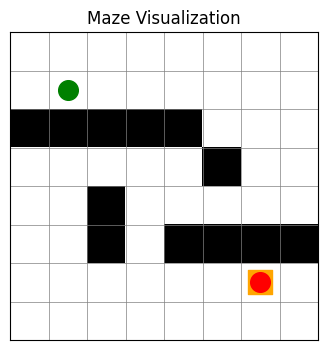

Episode: 463, Reward: -45, Epsilon: 0.098
Episode: 464, Reward: -26, Epsilon: 0.098
Episode: 465, Reward: -24, Epsilon: 0.097
Episode: 466, Reward: -22, Epsilon: 0.097
Episode: 467, Reward: -23, Epsilon: 0.096
Episode: 468, Reward: -24, Epsilon: 0.096
Episode: 469, Reward: -41, Epsilon: 0.095
Episode: 470, Reward: -18, Epsilon: 0.095
Episode: 471, Reward: -25, Epsilon: 0.094
Episode: 472, Reward: -20, Epsilon: 0.094
Episode: 473, Reward: -31, Epsilon: 0.093
Episode: 474, Reward: -23, Epsilon: 0.093
Episode: 475, Reward: -18, Epsilon: 0.092
Episode: 476, Reward: -31, Epsilon: 0.092
Episode: 477, Reward: -26, Epsilon: 0.092
Episode: 478, Reward: -19, Epsilon: 0.091
Episode: 479, Reward: -22, Epsilon: 0.091
Episode: 480, Reward: -18, Epsilon: 0.090
Episode: 481, Reward: -19, Epsilon: 0.090
Episode: 482, Reward: -21, Epsilon: 0.089
Episode: 483, Reward: -27, Epsilon: 0.089
Episode: 484, Reward: -22, Epsilon: 0.088
Episode: 485, Reward: -20, Epsilon: 0.088
Episode: 486, Reward: -22, Epsilon

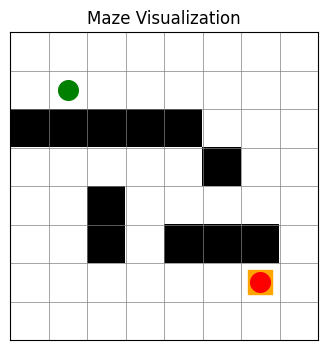

Episode: 661, Reward: -15, Epsilon: 0.036
Episode: 662, Reward: -17, Epsilon: 0.036
Episode: 663, Reward: -17, Epsilon: 0.036
Episode: 664, Reward: -16, Epsilon: 0.036
Episode: 665, Reward: -18, Epsilon: 0.036
Episode: 666, Reward: -15, Epsilon: 0.035
Episode: 667, Reward: -15, Epsilon: 0.035
Episode: 668, Reward: -15, Epsilon: 0.035
Episode: 669, Reward: -17, Epsilon: 0.035
Episode: 670, Reward: -15, Epsilon: 0.035
Episode: 671, Reward: -15, Epsilon: 0.035
Episode: 672, Reward: -15, Epsilon: 0.034
Episode: 673, Reward: -17, Epsilon: 0.034
Episode: 674, Reward: -17, Epsilon: 0.034
Episode: 675, Reward: -15, Epsilon: 0.034
Episode: 676, Reward: -15, Epsilon: 0.034
Episode: 677, Reward: -15, Epsilon: 0.034
Episode: 678, Reward: -17, Epsilon: 0.033
Episode: 679, Reward: -15, Epsilon: 0.033
Episode: 680, Reward: -15, Epsilon: 0.033
Episode: 681, Reward: -17, Epsilon: 0.033
Episode: 682, Reward: -17, Epsilon: 0.033
Episode: 683, Reward: -16, Epsilon: 0.033
Episode: 684, Reward: -15, Epsilon

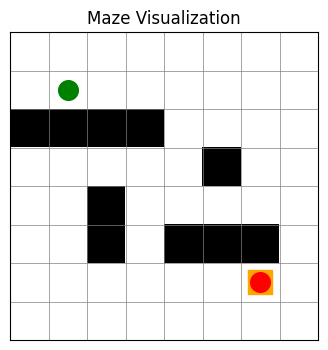

Episode: 867, Reward: -15, Epsilon: 0.013
Episode: 868, Reward: -15, Epsilon: 0.013
Episode: 869, Reward: -15, Epsilon: 0.013
Episode: 870, Reward: -17, Epsilon: 0.013
Episode: 871, Reward: -15, Epsilon: 0.013
Episode: 872, Reward: -15, Epsilon: 0.013
Episode: 873, Reward: -15, Epsilon: 0.013
Episode: 874, Reward: -15, Epsilon: 0.013
Episode: 875, Reward: -15, Epsilon: 0.012
Episode: 876, Reward: -15, Epsilon: 0.012
Episode: 877, Reward: -15, Epsilon: 0.012
Episode: 878, Reward: -15, Epsilon: 0.012
Episode: 879, Reward: -15, Epsilon: 0.012
Episode: 880, Reward: -15, Epsilon: 0.012
Episode: 881, Reward: -16, Epsilon: 0.012
Episode: 882, Reward: -15, Epsilon: 0.012
Episode: 883, Reward: -17, Epsilon: 0.012
Episode: 884, Reward: -15, Epsilon: 0.012
Episode: 885, Reward: -15, Epsilon: 0.012
Episode: 886, Reward: -15, Epsilon: 0.012
Episode: 887, Reward: -15, Epsilon: 0.012
Episode: 888, Reward: -15, Epsilon: 0.012
Episode: 889, Reward: -21, Epsilon: 0.012
Episode: 890, Reward: -15, Epsilon

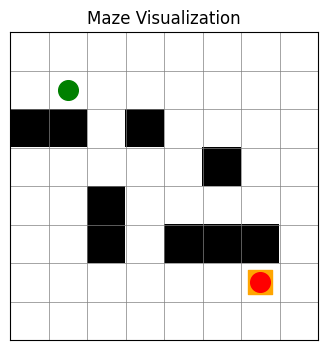

Episode: 1127, Reward: -15, Epsilon: 0.010
Episode: 1128, Reward: -15, Epsilon: 0.010
Episode: 1129, Reward: -15, Epsilon: 0.010
Episode: 1130, Reward: -15, Epsilon: 0.010
Episode: 1131, Reward: -16, Epsilon: 0.010
Episode: 1132, Reward: -15, Epsilon: 0.010
Episode: 1133, Reward: -15, Epsilon: 0.010
Episode: 1134, Reward: -15, Epsilon: 0.010
Episode: 1135, Reward: -15, Epsilon: 0.010
Episode: 1136, Reward: -17, Epsilon: 0.010
Episode: 1137, Reward: -15, Epsilon: 0.010
Episode: 1138, Reward: -15, Epsilon: 0.010
Episode: 1139, Reward: -15, Epsilon: 0.010
Episode: 1140, Reward: -15, Epsilon: 0.010
Episode: 1141, Reward: -15, Epsilon: 0.010
Episode: 1142, Reward: -15, Epsilon: 0.010
Episode: 1143, Reward: -15, Epsilon: 0.010
Episode: 1144, Reward: -15, Epsilon: 0.010
Episode: 1145, Reward: -15, Epsilon: 0.010
Episode: 1146, Reward: -17, Epsilon: 0.010
Episode: 1147, Reward: -15, Epsilon: 0.010
Episode: 1148, Reward: -15, Epsilon: 0.010
Episode: 1149, Reward: -21, Epsilon: 0.010
Episode: 11

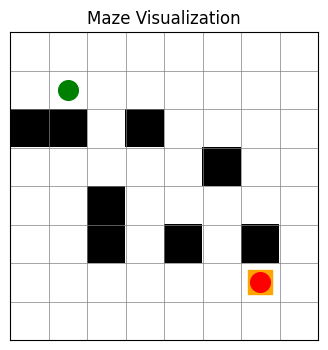

Episode: 1251, Reward: -17, Epsilon: 0.010
Episode: 1252, Reward: -15, Epsilon: 0.010
Episode: 1253, Reward: -15, Epsilon: 0.010
Episode: 1254, Reward: -15, Epsilon: 0.010
Episode: 1255, Reward: -17, Epsilon: 0.010
Episode: 1256, Reward: -15, Epsilon: 0.010
Episode: 1257, Reward: -15, Epsilon: 0.010
Episode: 1258, Reward: -15, Epsilon: 0.010
Episode: 1259, Reward: -15, Epsilon: 0.010
Episode: 1260, Reward: -15, Epsilon: 0.010
Episode: 1261, Reward: -15, Epsilon: 0.010
Episode: 1262, Reward: -15, Epsilon: 0.010
Episode: 1263, Reward: -15, Epsilon: 0.010
Episode: 1264, Reward: -15, Epsilon: 0.010
Episode: 1265, Reward: -15, Epsilon: 0.010
Episode: 1266, Reward: -15, Epsilon: 0.010
Episode: 1267, Reward: -15, Epsilon: 0.010
Episode: 1268, Reward: -15, Epsilon: 0.010
Episode: 1269, Reward: -15, Epsilon: 0.010
Episode: 1270, Reward: -15, Epsilon: 0.010
Episode: 1271, Reward: -15, Epsilon: 0.010
Episode: 1272, Reward: -15, Epsilon: 0.010
Episode: 1273, Reward: -17, Epsilon: 0.010
Episode: 12

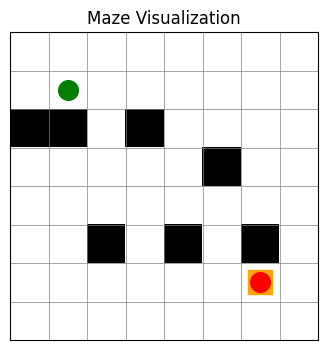

Episode: 1507, Reward: -15, Epsilon: 0.010
Episode: 1508, Reward: -15, Epsilon: 0.010
Episode: 1509, Reward: -15, Epsilon: 0.010
Episode: 1510, Reward: -15, Epsilon: 0.010
Episode: 1511, Reward: -15, Epsilon: 0.010
Episode: 1512, Reward: -15, Epsilon: 0.010
Episode: 1513, Reward: -17, Epsilon: 0.010
Episode: 1514, Reward: -15, Epsilon: 0.010
Episode: 1515, Reward: -15, Epsilon: 0.010
Episode: 1516, Reward: -15, Epsilon: 0.010
Episode: 1517, Reward: -15, Epsilon: 0.010
Episode: 1518, Reward: -18, Epsilon: 0.010
Episode: 1519, Reward: -15, Epsilon: 0.010
Episode: 1520, Reward: -15, Epsilon: 0.010
Episode: 1521, Reward: -15, Epsilon: 0.010
Episode: 1522, Reward: -15, Epsilon: 0.010
Episode: 1523, Reward: -15, Epsilon: 0.010
Episode: 1524, Reward: -15, Epsilon: 0.010
Episode: 1525, Reward: -17, Epsilon: 0.010
Episode: 1526, Reward: -15, Epsilon: 0.010
Episode: 1527, Reward: -15, Epsilon: 0.010
Episode: 1528, Reward: -15, Epsilon: 0.010
Episode: 1529, Reward: -15, Epsilon: 0.010
Episode: 15

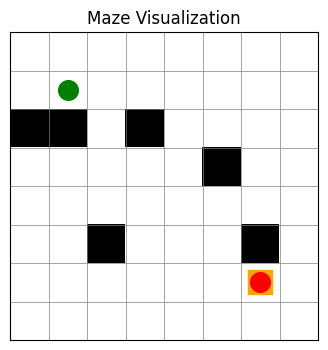

Episode: 1731, Reward: -15, Epsilon: 0.010
Episode: 1732, Reward: -15, Epsilon: 0.010
Episode: 1733, Reward: -15, Epsilon: 0.010
Episode: 1734, Reward: -15, Epsilon: 0.010
Episode: 1735, Reward: -15, Epsilon: 0.010
Episode: 1736, Reward: -15, Epsilon: 0.010
Episode: 1737, Reward: -15, Epsilon: 0.010
Episode: 1738, Reward: -15, Epsilon: 0.010
Episode: 1739, Reward: -15, Epsilon: 0.010
Episode: 1740, Reward: -15, Epsilon: 0.010
Episode: 1741, Reward: -15, Epsilon: 0.010
Episode: 1742, Reward: -15, Epsilon: 0.010
Episode: 1743, Reward: -15, Epsilon: 0.010
Episode: 1744, Reward: -17, Epsilon: 0.010
Episode: 1745, Reward: -15, Epsilon: 0.010
Episode: 1746, Reward: -15, Epsilon: 0.010
Episode: 1747, Reward: -15, Epsilon: 0.010
Episode: 1748, Reward: -15, Epsilon: 0.010
Episode: 1749, Reward: -15, Epsilon: 0.010
Episode: 1750, Reward: -17, Epsilon: 0.010
Episode: 1751, Reward: -15, Epsilon: 0.010
Episode: 1752, Reward: -15, Epsilon: 0.010
Episode: 1753, Reward: -15, Epsilon: 0.010
Episode: 17

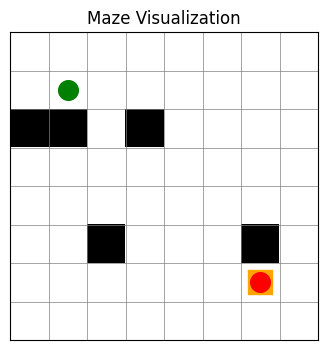

Episode: 1993, Reward: -15, Epsilon: 0.010
Episode: 1994, Reward: -17, Epsilon: 0.010
Episode: 1995, Reward: -19, Epsilon: 0.010
Episode: 1996, Reward: -15, Epsilon: 0.010
Episode: 1997, Reward: -15, Epsilon: 0.010
Episode: 1998, Reward: -15, Epsilon: 0.010
Episode: 1999, Reward: -15, Epsilon: 0.010
Episode: 2000, Reward: -15, Epsilon: 0.010
Training finished.


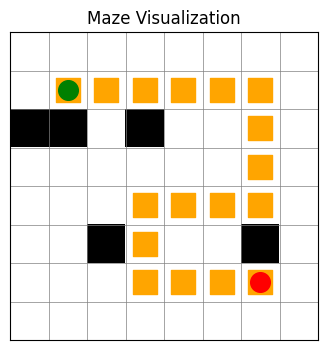

Total reward: -15


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

SEED = 15
np.random.seed(SEED)

GRID_DIM = 8
START_IDX = (1, 1)
FINISH_IDX = (6, 6)
OBSTACLES = [
    (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5),
    (4, 2), (3, 5),
    (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7)
]

EPISODES = 2000
MAX_STEPS = 100
N_SHORTCUTS = 9
SHORTCUTS = [int(np.random.normal((i+1)*(EPISODES/N_SHORTCUTS+1), 50)) for i in range(N_SHORTCUTS)]

class Environment():
    def __init__(self, grid_w, grid_h, start_idx, finish_idx, obstacles) -> None:
        self.grid_h = grid_h
        self.grid_w = grid_w
        self.current_idx = start_idx
        self.start_idx = start_idx
        self.finish_idx = finish_idx
        self.matrix = np.zeros((grid_h, grid_w))
        self.original_obstacles = obstacles
        self.obstacles = obstacles
        for obstacle in obstacles:
            self.matrix[obstacle[0], obstacle[1]] = 1

    def visualize(self, value_function=None, path=None):
        binary_matrix = np.array(self.matrix)
        plt.figure(figsize=(self.grid_w//2, self.grid_h//2))
        plt.imshow(binary_matrix, cmap='binary', interpolation='nearest')

        for i in range(self.grid_w - 1):
            plt.axvline(i + 0.5, color='gray', linestyle='-', linewidth=0.5)
        for i in range(self.grid_h - 1):
            plt.axhline(i + 0.5, color='gray', linestyle='-', linewidth=0.5)

        if path is None:
            plt.scatter(self.current_idx[1], self.current_idx[0], color='orange', s=300, marker='s', label='Current')
        else:
            plt.scatter([idx[1] for idx in path], [idx[0] for idx in path], color='orange', s=300, marker='s', label='Path')
        plt.scatter(self.start_idx[1], self.start_idx[0], color='green', s=200, marker='o', label='Start')
        plt.scatter(self.finish_idx[1], self.finish_idx[0], color='red', s=200, marker='o', label='Finish')

        if value_function is not None:
            for i in range(self.grid_h):
                for j in range(self.grid_w):
                    value = value_function[i][j]
                    plt.text(j, i, f'{value:.1f}', color='black', ha='center', va='center')

        plt.title('Maze Visualization')
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.show()

    def step(self, action):
        # UP
        if action == 0:
            next_index = (self.current_idx[0] - 1, self.current_idx[1])
            if next_index[0] >= 0 and self.matrix[next_index[0]][next_index[1]] == 0:
                self.current_idx = next_index
                if next_index == self.finish_idx:
                    return next_index, 0, True
                return next_index, -1, False
            else:
                return self.current_idx, -1, False

        # RIGHT
        if action == 1:
            next_index = (self.current_idx[0], self.current_idx[1] + 1)
            if next_index[1] < self.grid_w and self.matrix[next_index[0]][next_index[1]] == 0:
                self.current_idx = next_index
                if next_index == self.finish_idx:
                    return next_index, 0, True
                return next_index, -1, False
            else:
                return self.current_idx, -1, False

        # DOWN
        if action == 2:
            next_index = (self.current_idx[0] + 1, self.current_idx[1])
            if next_index[0] < self.grid_h and self.matrix[next_index[0]][next_index[1]] == 0:
                self.current_idx = next_index
                if next_index == self.finish_idx:
                    return next_index, 0, True
                return next_index, -1, False
            else:
                return self.current_idx, -1, False

        # LEFT
        if action == 3:
            next_index = (self.current_idx[0], self.current_idx[1] - 1)
            if next_index[1] >= 0 and self.matrix[next_index[0]][next_index[1]] == 0:
                self.current_idx = next_index
                if next_index == self.finish_idx:
                    return next_index, 0, True
                return next_index, -1, False
            else:
                return self.current_idx, -1, False

    def reset(self, reset_obstacles=False):
        self.current_idx = self.start_idx
        if reset_obstacles:
            self.obstacles = self.original_obstacles
        return self.current_idx

    def remove_random_obstacle(self):
        num_obstacles = np.sum(self.matrix)
        if num_obstacles > 0:
            z = np.random.randint(num_obstacles)
            new_obstacles = []
            for i in range(len(self.obstacles)):
                if (z % len(self.obstacles)) != i:
                    new_obstacles.append(self.obstacles[i])
            self.obstacles = new_obstacles
            self.matrix = np.zeros((len(self.matrix), len(self.matrix[0])))
            for obstacle in self.obstacles:
                self.matrix[obstacle[0], obstacle[1]] = 1


env = Environment(grid_h=GRID_DIM, grid_w=GRID_DIM, start_idx=START_IDX, finish_idx=FINISH_IDX, obstacles=OBSTACLES)
env.visualize()

class Agent():
    def __init__(self, env: Environment) -> None:
        self.env = env
        self.state = env.reset()

    def act(self, state):
        pass

class RandomAgent(Agent):
    def act(self, state):
        return np.random.choice(4)

class QLearningAgent(Agent):
    def __init__(self, env: Environment, alpha=0.1, gamma=0.99, epsilon=1.0, epsilon_decay=0.995, epsilon_min=0.01) -> None:
        super().__init__(env)
        self.q_table = np.zeros((env.grid_h, env.grid_w, 4))
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min

    def act(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.choice(4)
        else:
            return np.argmax(self.q_table[state[0], state[1], :])

    def update_q_table(self, state, action, reward, next_state):
        best_next_action = np.argmax(self.q_table[next_state[0], next_state[1], :])
        td_target = reward + self.gamma * self.q_table[next_state[0], next_state[1], best_next_action]
        td_error = td_target - self.q_table[state[0], state[1], action]
        self.q_table[state[0], state[1], action] += self.alpha * td_error

    def train(self):
        for episode in range(1, EPISODES + 1):
            state = self.env.reset()
            accumulated_reward = 0
            for step in range(MAX_STEPS):
                action = self.act(state)
                next_state, reward, done = self.env.step(action)
                self.update_q_table(state, action, reward, next_state)
                state = next_state
                accumulated_reward += reward
                if done:
                    break
            self.epsilon = max(self.epsilon_min, self.epsilon * self.epsilon_decay)
            if episode in SHORTCUTS:
                self.env.remove_random_obstacle()
                print(f"Shortcut at episode {episode}")
                self.env.visualize()
            print(f"Episode: {episode}, Reward: {accumulated_reward}, Epsilon: {self.epsilon:.3f}")
        print("Training finished.")

env = Environment(grid_h=GRID_DIM, grid_w=GRID_DIM, start_idx=START_IDX, finish_idx=FINISH_IDX, obstacles=OBSTACLES)
agent = QLearningAgent(env)
agent.train()

env.reset()
rewards = []
state = env.reset()
path = [state]
for _ in range(MAX_STEPS):
    action = agent.act(state)
    next_state, reward, done = env.step(action)
    state = next_state
    path.append(state)
    rewards.append(reward)
    if done:
        break

env.visualize(path=path)
print(f"Total reward: {sum(rewards)}")
